In [1]:
import Functions as func
import SimModel
import matplotlib.pyplot as plt
import Agent
import pylab as pltstack
import numpy as np

In [2]:
datafcr, dataafrr, datamfrr, datalastprofile, pvdata, pricedata = func.getdata('09-10','09-25')

agent = Agent.agentoccupancyrate(100)
#agent = Agent.agentnopv()
#agent = Agent.agentmanualinput()

model = SimModel.Model(datalastprofile, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], pvdata, 6, 5, 100, agent)


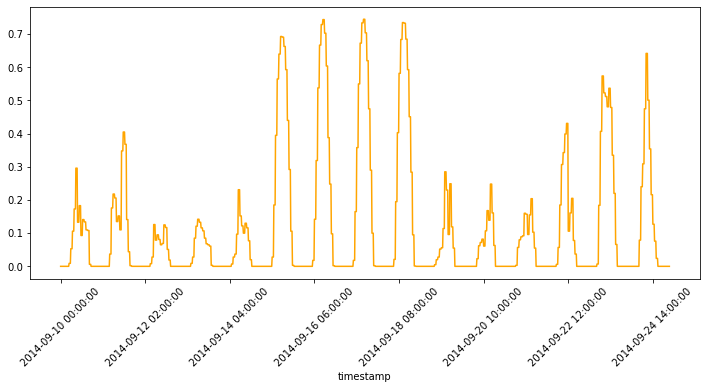

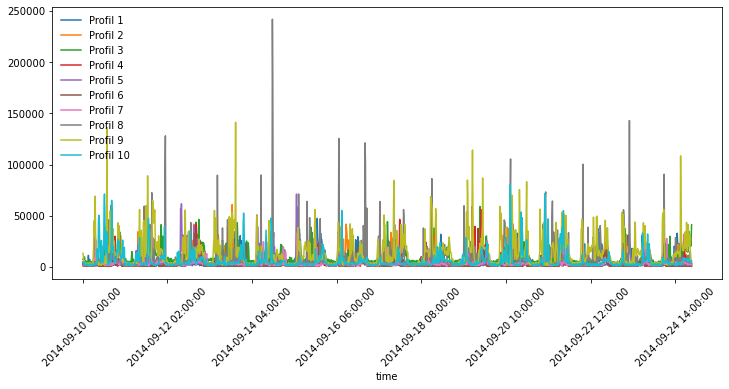

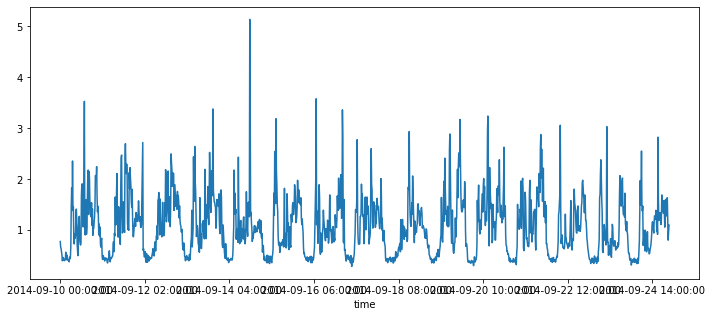

In [3]:
func.plotpvdata(pvdata)
func.plotlastprofiledata(datalastprofile, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.figure(figsize=(12, 5))
datalastprofile['Summe'].plot()

In [4]:
model.run()

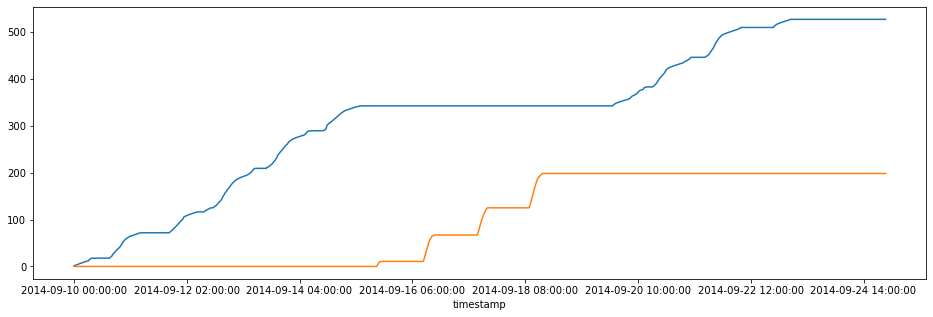

In [5]:
plt.figure(figsize=(16, 5))
cumsumdatadraw = model.logdata['drawfromgrid'].cumsum()
cumsumdatafeed = model.logdata['feedingrid'].cumsum()
cumsumdatadraw.plot()
cumsumdatafeed.plot()

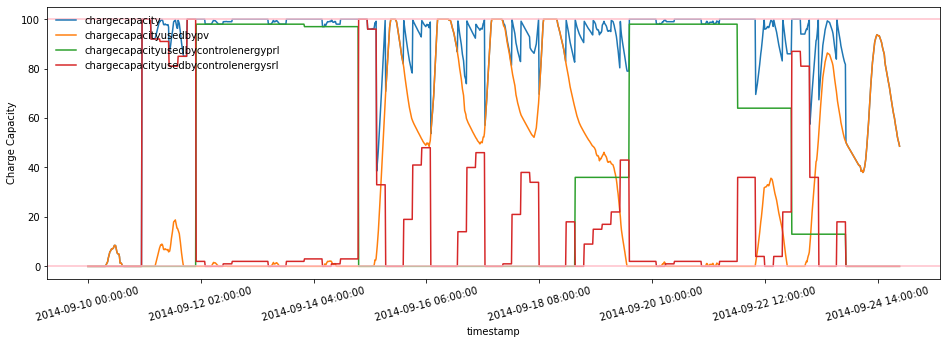

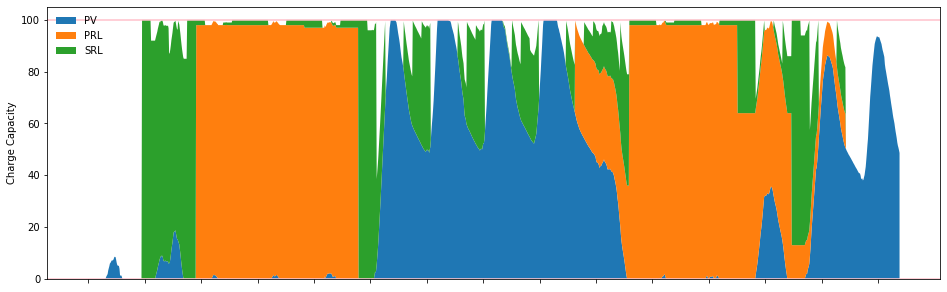

In [6]:
func.plotchargecapacity(model)

In [7]:
model.logdata.to_csv('test.csv')